In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [39]:
stock_df = pd.read_csv('Official_Data.csv')
stock_df

,Time,Adj Closed Price,Quarterly Return (%),Average Return (%),Stock,Market Sector,Month,month,Quarter,Size,Year
0,01/01/2021,17.374220,0.000000,7.059396,HAL,Energy,Jan,1,1,Big Cap,2021
1,01/04/2021,19.313990,11.164645,7.059396,HAL,Energy,Apr,4,2,Big Cap,2021
2,01/08/2021,19.768332,2.352398,7.059396,HAL,Energy,Aug,8,3,Big Cap,2021
3,01/12/2021,22.678337,14.720539,7.059396,HAL,Energy,Dec,12,4,Big Cap,2021
4,01/01/2021,1835.739990,0.000000,12.865037,GOOG,Communication Services,Jan,1,1,Mega Cap,2021
...,...,...,...,...,...,...,...,...,...,...,...
115,01/12/2017,284.992889,6.416015,7.108607,LMT,Industrials,Dec,12,4,Big Cap,2017
116,01/01/2017,147.559998,0.000000,1.274231,PANW,Information Technology,Jan,1,1,Big Cap,2017
117,01/04/2017,108.410004,-26.531577,1.274231,PANW,Information Technology,Apr,4,2,Big Cap,2017
118,01/08/2017,132.690002,22.396455,1.274231,PANW,Information Technology,Aug,8,3,Big Cap,2017


In [4]:
sns.set_style('dark')

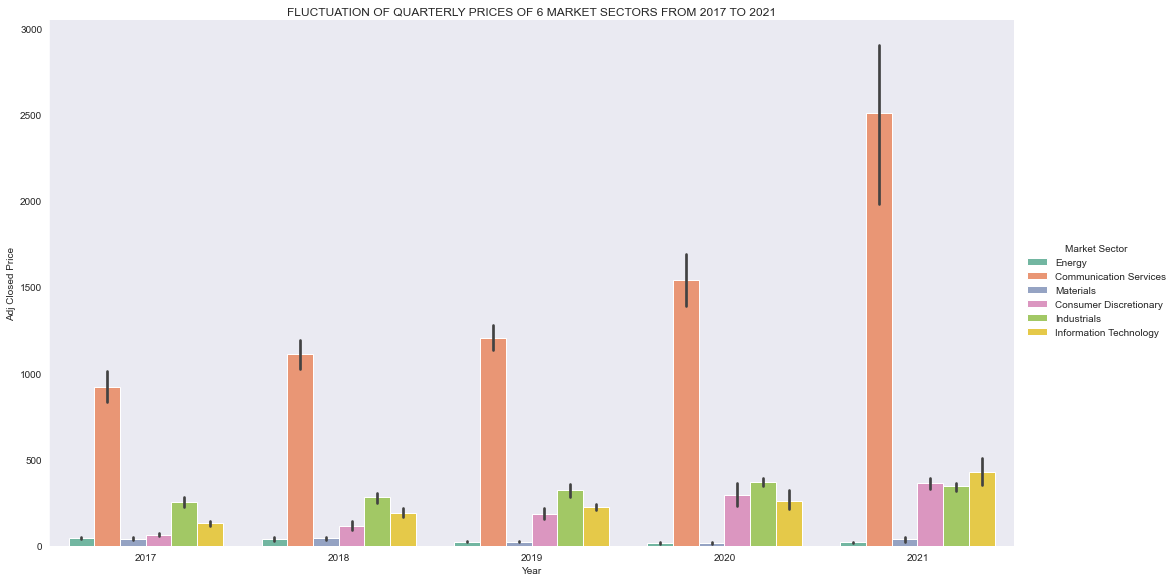

In [22]:
# Bar Plot

# Ý nghĩa: Biểu đồ thể hiện giá trị cổ phiếu theo quý của 6 nhóm ngành phổ biến 
#          trên thị trường chứng khoán thế giới trong giai đoạn 2017 - 2021

# Nhận xét: Trong giai đoạn 2017 - 2021, ngành Industrials có giá trị cổ phiếu biến động nhẹ. Trong khi đó, cổ phiếu của 
#           các ngành Energy và Materials luôn duy trì ở mức giá (trung bình) thấp nhất trong 6 nhóm ngành trên thị trường.
#           Ở chiều ngược lại, các ngành Consumer Discretionary và Information Technology ghi nhận sự gia tăng rõ rệt về 
#           giá trị cổ phiếu trong giai đoạn này. Đặc biệt, giá trị cổ phiếu của ngành Communication Services đã tăng trưởng
#           mạnh mẽ nhất trong giai đoạn này và luôn là ngành dẫn đầu qua các năm. Như vậy, các nhà đầu tư có thể cân nhắc 
#           đầu tư vào các mã của ngành Communication Services.      

sns.catplot(data = stock_df, x = 'Year', y = 'Adj Closed Price',
            hue = 'Market Sector', palette = 'Set2', height = 8, 
            aspect = 1.8, kind = 'bar').set(title = 'FLUCTUATION OF QUARTERLY PRICES OF 6 MARKET SECTORS FROM 2017 TO 2021')

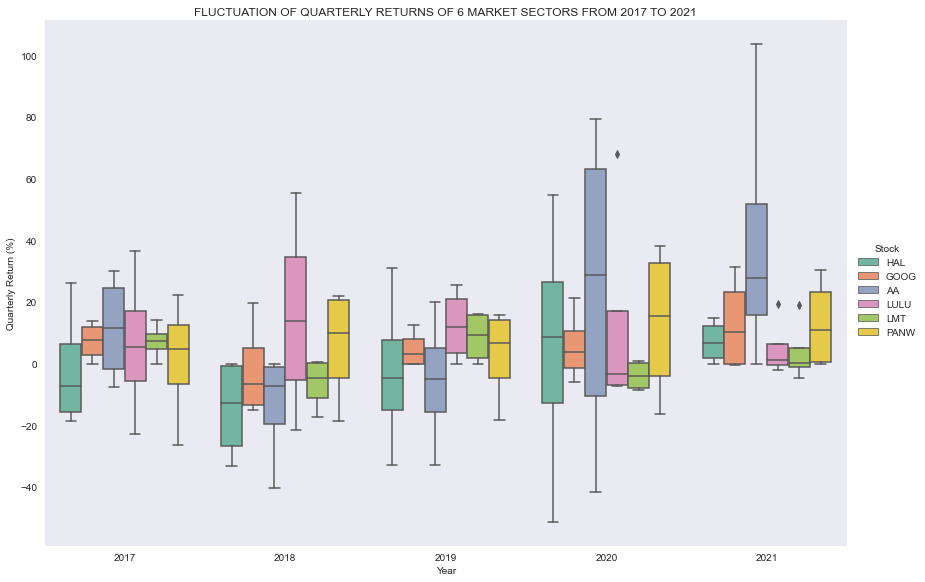

In [31]:
# Box Plot

# Ý nghĩa: Biểu đồ thể hiện lợi nhuận theo quý của 6 mã cổ phiếu đại diện 6 nhóm ngành 
#          phổ biến trên thị trường chứng khoán thế giới trong giai đoạn 2017 - 2021

# Nhận xét: Trong giai đoạn 2017 - 2021, lợi nhuận theo quý của 6 mã cổ phiếu lớn đã có sự biến động. Trong đó, 
#           mã HAL và AA đã ghi nhận sự biến động mạnh nhất khi lợi nhuận theo quý liên tục giảm và tăng đáng kể
#           qua các năm, cùng với đó là các mã LULU và PANW có mức biến động lợi nhuận hơi lớn nhưng có thể chấp
#           nhận được đối với các nhà đầu tư ưa mạo hiểm khi hàng năm lợi nhuận tăng - giảm đáng kể.
#           Ở chiều ngược lại, khoảng biến động lợi nhuận theo quý của mã GOOG và LMT tương đối ngắn,
#           cho thấy lợi nhuận theo quý của 2 mã không biến động đáng kể nên việc đầu tư vào 2 mã này có khả năng
#           ít rủi ro so với các mã còn lại, điều này có thể phù hợp với các nhà đầu tư có quan điểm ưa thận trọng.

sns.catplot(data = stock_df, x = 'Year', y = 'Quarterly Return (%)', hue = 'Stock', 
            width = .8, palette = 'Set2', kind = 'box',
            height = 8, aspect = 1.5).set(title = "FLUCTUATION OF QUARTERLY RETURNS OF 6 MARKET SECTORS FROM 2017 TO 2021")

In [42]:
# Tiền xử lý dữ liệu

sts = pd.pivot_table(data = stock_df, index = 'Market Sector', columns = 'Year', values = 'Average Return (%)')
sts

Year,2017,2018,2019,2020,2021
Market Sector,,,,,
Communication Services,7.195792,-2.072057,4.740414,5.601692,12.865037
Consumer Discretionary,6.064552,15.334789,12.369317,13.524119,4.795864
Energy,-1.838996,-23.976429,-2.734285,5.115402,7.059396
Industrials,7.108607,-6.437682,8.613395,-3.870375,3.665104
Information Technology,1.274231,5.874420,2.808055,25.841095,12.994131
Materials,11.349066,-13.706801,-5.734348,23.867549,39.806471


[Text(0.5, 0, '2017'),
 Text(1.5, 0, '2018'),
 Text(2.5, 0, '2019'),
 Text(3.5, 0, '2020'),
 Text(4.5, 0, '2021')]

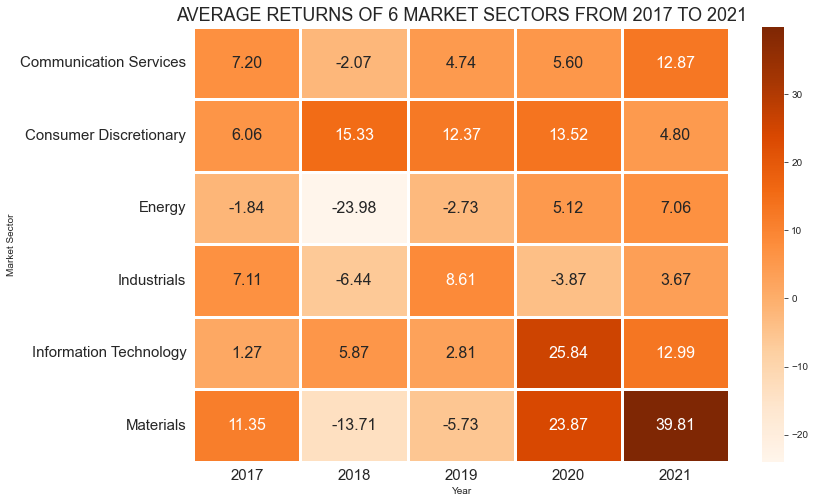

In [43]:
# Heat Map

# Ý nghĩa: Biểu đồ thể hiện lợi nhuận trung bình hàng năm của 6 nhóm ngành phổ biến
#          trên thị trường chứng khoán thế giới trong giai đoạn 2017 - 2021

# Nhận xét: Trong giai đoạn 2017 - 2021, lợi nhuận trung bình hàng năm của 6 nhóm ngành có sự biến động rõ rệt. 
#           Trong năm 2017, ngành Materials có lợi nhuận trung bình cao nhất, tuy nhiên đến giai đoạn 2018 - 2019,
#           ngành Consumer Discretionary vươn lên dẫn đầu về lợi nhuận trung bình. Đặc biệt, năm 2020 ghi nhận sự 
#           tăng trưởng lợi nhuận đáng kể của 2 ngành Information Technology và Materials, đặc biệt đến năm 2021
#           tiếp tục ghi nhận mức lợi nhuận trung bình tăng vượt bậc của ngành Materials. Như vậy, tuy ngành
#           Materials ghi nhận sự biến động mạnh mẽ về lợi nhuận theo quý (đồng nghĩa với rủi ro đầu tư tương đối cao)
#           nhưng nhìn chung về lợi nhuận trung bình năm thì Materials có thể được đầu tư bởi các nhà đầu tư ưa mạo hiểm.


fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(data = sts, annot = True, fmt = '.2f',
            linewidths = 3, annot_kws = {'fontsize':16}, cmap = 'Oranges')

title = 'AVERAGE RETURNS OF 6 MARKET SECTORS FROM 2017 TO 2021'
ax.set_title(title, fontsize = 18)

yticks = sts.index
xticks = sts.columns
ax.set_yticklabels(yticks, rotation = 0, fontsize = 15)
ax.set_xticklabels(xticks, rotation = 0, fontsize = 15)